<a href="https://colab.research.google.com/github/lovecrushfamily/2021-CS109A/blob/master/content/lectures/lecture06/notebook/s4_ex1_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Title :
Exercise: Simple Lasso and Ridge Regularization

## Description :
The aim of this exercise is to understand **Lasso and Ridge regularization.**

For this we will plot the predictor vs coefficient as a horizontal bar chart. The graph will look similar to the one given below.

<img src="https://github.com/Harvard-IACS/2021-CS109A/blob/master/content/lectures/lecture06/fig/fig2.png?raw=1" style="width: 500px;">

## Data Description:

## Instructions:

- Read the dataset and assign the predictor and response variables.
- Split the dataset into train and validation sets.
- Fit a multi-linear regression model.
- Compute the validation MSE of the model.
- Compute the coefficient of the predictors and store to the plot later.
- Implement Lasso regularization by specifying an alpha value. Repeat steps 4 and 5.
- Implement Ridge regularization by specifying the same alpha value. Repeat steps 4 and 5.
- Plot the coefficient of all the 3 models in one graph as shown above.

## Hints:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html" target="_blank">sklearn.normalize()</a>
Scales input vectors individually to the unit norm (vector length)

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">sklearn.train_test_split()</a>
Splits the data into random train and test subsets

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">sklearn.LinearRegression()</a>
LinearRegression fits a linear model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit" target="_blank">sklearn.fit()</a>
Fits the linear model to the training data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict" target="_blank">sklearn.predict()</a>
Predict using the linear modReturns the coefficient of the predictors in the model.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html" target="_blank">mean_squared_error()</a>
Mean squared error regression loss

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html" target="_blank">sklearn.Lasso()</a>
Linear Model trained with L1 prior as a regularizer

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html" target="_blank">sklearn.Ridge()</a>
Linear least squares with L2 regularization

**Note:** This exercise is auto-graded and you can try multiple attempts.

In [2]:
# Import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


### Reading the dataset

In [4]:
# Read the file "Boston_housing.csv" as a Pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/refs/heads/master/content/lectures/lecture06/data/Boston_housing.csv")
df


,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Predictors & Response variables

Select the following columns as predictors
- crim
- indus
- nox
- rm
- age
- dis
- rad
- tax
- ptratio
- black
- lstat

#### Select the 'medv' column as response variable

In [5]:
# Select a subdataframe of predictors mentioned above
X = df[["crim","indus","nox","rm","age","dis","rad","tax","ptratio","black","lstat"]]

# Normalize the values of the dataframe
X_norm = preprocessing.normalize(X)

# Select medv as the response variable
y = df["medv"]


### Split the dataset into train and validation sets


In [7]:
### edTest(test_random) ###
# Split the data into train and validation sets with 70% train data and
# random_state as 31
X_train, X_val, y_train, y_val = train_test_split(X, y)


### Multi-linear Regression Analysis

In [8]:
# Initialize a Linear Regression model
lreg = LinearRegression()

# Fit the linear model on the train data
lreg.fit(X_train, y_train)

# Predict on the validation data
y_val_pred = lreg.predict(X_val)


In [10]:
# Use the mean_squared_error function to compute the validation mse
mse = mean_squared_error(y_val_pred, y_val)

# Print the MSE value
print ("Multi-linear regression validation MSE is", mse)



Multi-linear regression validation MSE is 24.66393027222828


### Obtaining the coefficients of the predictors

In [16]:
# Helper code to create a dictionary of the coefficients
# along with the predictors as keys
lreg_coef = dict(zip(X.columns, np.transpose(lreg.coef_)))

# Linear regression coefficients for plotting
lreg_x = list(lreg_coef.keys())
lreg_y = list(lreg_coef.values())

lreg_x, lreg_y




(['crim',
  'indus',
  'nox',
  'rm',
  'age',
  'dis',
  'rad',
  'tax',
  'ptratio',
  'black',
  'lstat'],
 [np.float64(-0.08047756906134963),
  np.float64(0.019062249581773306),
  np.float64(-16.80137902436115),
  np.float64(4.708495156999328),
  np.float64(-0.0022664374091425675),
  np.float64(-1.1330821470081804),
  np.float64(0.26355596654107294),
  np.float64(-0.010852063125598988),
  np.float64(-1.1218409417206265),
  np.float64(0.011669827534591427),
  np.float64(-0.46137313934110497)])

### Implementing Lasso regularization

In [18]:
# Create a Lasso Regression model with alpha as 0.008
lasso_reg = Lasso(alpha=0.008)

# Fit the model on the train data
lasso_reg.fit(X_train, y_train)

# Predict on the validation data using the trained model
y_val_pred =lasso_reg.predict(X_val)


### Computing the MSE with Lasso regularization

In [19]:
# Calculate the validation MSE
mse_lasso = mean_squared_error(y_val_pred, y_val)

# Print the validation MSE
print ("Lasso validation MSE is", mse_lasso)


Lasso validation MSE is 24.71344610618246


In [21]:

# Hhelper code to make a dictionary of the predictors
# along with the coefficients associated with them
lasso_coef = dict(zip(X.columns, np.transpose(lasso_reg.coef_)))

# Get the Lasso regularisation coefficients for plotting
lasso_x = list(lasso_coef.keys())
lasso_y = list(lasso_coef.values())

lasso_x, lasso_y


(['crim',
  'indus',
  'nox',
  'rm',
  'age',
  'dis',
  'rad',
  'tax',
  'ptratio',
  'black',
  'lstat'],
 [np.float64(-0.07849262729033969),
  np.float64(0.006689729064948404),
  np.float64(-14.221089710351778),
  np.float64(4.7156980085023505),
  np.float64(-0.004575973492669824),
  np.float64(-1.091494038823684),
  np.float64(0.25495833697659204),
  np.float64(-0.010916537646304429),
  np.float64(-1.087519568008948),
  np.float64(0.011818336343867383),
  np.float64(-0.4647706344046556)])

### Implementing Ridge regularization

In [22]:
# Create a Ridge Regression model with alpha as 0.008
ridgeReg = Ridge(alpha=0.008)

# Fit the model on the train data
ridgeReg.fit(X_train, y_train)

# Predict the trained model on the validation data
y_val_pred = ridgeReg.predict(X_val)


### Computing the MSE with Ridge regularization

In [23]:

### edTest(test_mse) ###

# Calculate the validation MSE
mse_ridge = mean_squared_error(y_val_pred, y_val)

# Print he valdiation MSE
print ("Ridge validation MSE is", mse_ridge)


Ridge validation MSE is 24.665944649373216


### Obtaining the coefficients of the predictors

In [24]:

# Helper code to make a dictionary of the predictors
# along with the coefficients associated with them
ridge_coef = dict(zip(X.columns, np.transpose(ridgeReg.coef_)))

# Ridge regularisation coefficients for plotting
ridge_x = list(ridge_coef.keys())
ridge_y = list(ridge_coef.values())


### Plotting the graph

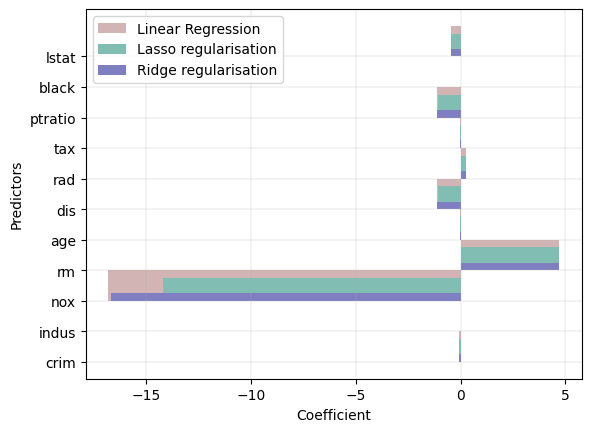

In [27]:
# Helper code below to visualise your results

plt.rcdefaults()

plt.barh(lreg_x,lreg_y,1.0, align='edge',color="#D3B4B4", label="Linear Regression")
plt.barh(lasso_x,lasso_y,0.75 ,align='edge',color="#81BDB2",label = "Lasso regularisation")
plt.barh(ridge_x,ridge_y,0.25 ,align='edge',color="#7E7EC0", label="Ridge regularisation")
plt.grid(linewidth=0.2)
plt.xlabel("Coefficient")
plt.ylabel("Predictors")
plt.legend(loc='best')
# plt.xlim(-6500,3500)
plt.show()


#### ⏸ How does the performance of Lasso and Ridge regression compare with that of Linear regression?

In [ ]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below
answer1 = 'The lasso and ridge regression limit the affection of beta parameter,or I would say it normalize the result of the model, it control the model performance'


#### ⏸ Change the alpha values for both, Lasso and Ridge, to 1000. What happens to the coefficients?


In [ ]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below
answer2 = '___'
